# Minería de datos
### PRA1 - Selección y preparación de un juego de datos

Oliver Luque Caballero

4t cuatrimestre. Mayo 2024

REF. https://fundaciondelcorazon.com/blog-impulso-vital/3264-las-cifras-de-la-enfermedad-cardiovascular.html
https://www.acc.org/Latest-in-Cardiology/Articles/2024/02/05/11/43/2023-ESH-Hypertension-Guideline-Update#:~:text=Systolic%20blood%20pressure%20(SBP)%20ranging,85%2D89%20mm%20Hg).

In [24]:
# Librerias necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# Añadimos el dataset
df = pd.read_csv('heart.csv')

Para este reto vamos a realizar un estudio tipico de la minería de datos. Vamos a realizar dos entregas para completar el proyecto. En esta primera parte, dado los diferentes pasos que se piden en el enunciado, vamos a realizar los siguientes apartados:

1) [Planteamiento de un ejercicio de minería.](#sección-1)
2) [Seleccionar un dataset apropiado para el proyecto.](#sección-2)
4) [Hacer un análisis exploratorio de los datos.](#sección-3)
4) [Realizar una tarea de limpieza y preparación para adaptar los datos a los modelos deseados.](#sección-4)
5) [Utilizar métodos de discretización.](#sección-5)
6) [Aplicar un estudio SVD sobre el juego de datos.](#sección-6)


# <a id="sección-1"></a>Planteamiento del proyecto 

Este proyecto sobre minería de datos se centrará en la creación de un modelo predictivo de cardiopatías. Es decir, a partir de unos datos el modelo será capaz de establecer si una persona corre riesgo de padecer una cardiopatía. 

Antes de nada, debemos entender que son las cardiopatías. Hay diferentes tipos de esta enfermedad, en cualquier caso todas las cardiopatías afectan a los vasos sanguíneos y al corazón. Esta enfermedad causa el 31% de las muertes del mundo, por ello es muy importante conocer si eres una persona de riesgo para poder estar atento en caso de sentir alguna molestia o síntomas comunes. Esta es la razón principal por la cual se ha decidido llevar a cabo este estudio. Con este proyecto de minería de datos pretendemos establecer un modelo predictivo para advertir a aquellas personas que puedan padecer esta enfermedad. 
 
Una vez visto que es la enfermedad cardiovascular. La idea es utilizar un conjunto de datos donde se recojan diferentes medidas médicas relacionadas con los parámetros sanguíneos, dolores y otras variables y las compararemos entre personas diagnosticadas por profesionales que padecen cardiopatías y que no. De esta manera, en futuros pacientes podremos predecir con nuestro modelo si presenta las características típicas para poder padecer un problema cardiovascular. 

Para realizar este proyecto vamos a utilizar la metodología **CRISP-DM**, uno de los métodos más recurrentes utilizados en la minería de datos:


<div>
<img src="CRISP-DM.png" alt="CRISP-DM" width="1000"/>
</div>



# <a id="sección-2"></a>Selección del dataset

Para este proyecto hemos decidido utilizar  el dataset subido a [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) por el usuario DAVID LAPP. Revisando la documentación y la fuente original hemos encontrado que los datos proceden de [UCI Irvine](https://archive.ics.uci.edu/dataset/45/heart+disease) (University of California). Este conjunto de datasets son datos sobre diferentes pacientes que algunos padecían y otros no cardiopatías. Estos datos provienen de las siguientes instituciones:
1) Cleveland Clinic Foundation (cleveland.data)
2) Hungarian Institute of Cardiology, Budapest (hungarian.data)
3) V.A. Medical Center, Long Beach, CA (long-beach-va.data)
4) University Hospital, Zurich, Switzerland (switzerland.data)

Estos datasets estaban formados de diversas columnas con graves errores y grandes cantidades de nulos, hablamos de que originariamente entre todos los datasets encontrábamos 76 variables. Por ello David W. Aha antes de donarlos a la Universidad de California en 1988 unificó los datasets y eliminó los nombres de las personas reales. Ahora nos encontramos con 14 columnas que comparten los 4 datasets.

Hemos elegido este conjunto de datasets por su gran conjunto de datos y de cálidad. Lo veremos en el siguiente apartado, pero nos encontramos con un dataset bastante grande que alberga diversas variables a estudiar. Ademas de provenir de fuentes fiables como son las diversas instituciones mencionadas. Encontramos variables muy interesantes como són la azúcar en sangre, análisis de cardiogramas, dolores de pecho e incluso el nivel de colesterol de los pacientes.

Con respecto a las exigencias del enunciado podemos ver como nuestro dataset cumple:
* Tiene como mínimo 500 observaciones
* Tiene un mínimo de 5 variables numéricas
* Tiene como mínimo 2 variables categóricas
* Tiene como mínimo 1 variable binaria
* Y además no es un tema ni un dataset dado en alguna PEC anterior. 

David W. Aha cuando donó estos datos pidió que cuando se utilizaran se mencionaran las personas que originariamente recolectaron los datos. Por ello, quería hacer una mención especial a dichos investigadores porque sin ellos este trabajo no sería posible:

1) Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2) University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3) University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4) V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# <a id="sección-3"></a>Análisis exploratorio de los datos
Como hemos mencionado, vamos a apoyarnos en el dataset formalizado por el usuario DAVID LAPP de Kaggle con todos los datos originales estandarizados. Vamos a estudiar el dataset elegido. Antes de nada vamos a visualizar las diferentes columnas de nuestro dataset y comprobar su información. 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Podemos ver como nos encontramos con 1.025 filas y con 14 columnas. Si nos fijamos en la documentación proporcionada con el dataset tenemos:
- `age` (Numérica). Edad del paciente.
- `sex` (Binaria). Sexo del paciente donde 1 es para hombres y 0 para mujeres.
- `cp`(Categórica). Dolor de pecho, encontramos 4 grupos:
    - 1: Dolor tipico de angina
    - 2: Dolor no tipico de angina
    - 3: No es dolor de angina
    - 4: Asintomático
- `trestbps` (Numérica). Presión arterial en reposo (mm Hg). Medida tomada cuando el paciente entró en el hospital.
- `chol` (Numérica). Cantidad de serum de colesterol (mg/dl).
- `fbs` (Binaria). Si el paciente presenta más de 120 mg/dl de glucemia en ayunas encontramos 1, en caso contrario tenemos 0. 
- `restecg` (Categórica). Resultado de realizarle al paciente un electrocardiograma en reposo, tenemos estas 3 posibilidades:
    - 0: hipertrofia ventricular izquierda probable o definida
    - 1: normal
    - 2: anomalía de la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV)
- `thalach` (Numérica). Frecuencia cardiaca máxima alcanzada del paciente.
- `exang` (Binaria). La angina ha sido inducida por el ejercicio, en caso afirmativo encontramos 1 sino 0.
- `oldpeak` (Numérica). Diferencia del ST realizada al paciente en ejercicio comparada con la realizada en reposo.
- `slope` (Categórica). La forma de la pendiente del segmento ST realizado con el paciente en ejercicio. Encontramos estas formas:
    - 0: Plano
    - 1: Pendiente ascendiente
    - 2: Pendiente descendiente
- `ca`(Numérica). Número de vasos mayores coloreados por flouroscopia. Los valores oscilan entre 0 y 3.
- `thal` (Categórica).  Variable que menciona que tipo de talasemia (Un trastorno sanguíneo) presenta el paciente;
    - 0: No presenta talasemia
    - 1: Presenta talasemia beta
    - 2: Presenta talasemia alfa 
- `target` (Binaria). Variable que define si se presenta una cardiopatía en el paciente, en caso afirmativo 1 sino 0.

Además, usando el comando `df.info()`  podemos ver como no nos encontramos valores nulos en los datos. Por otro lado, vamos a visualizar las primeras filas del dataframe.

In [27]:
df.head(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Podemos ver como a priori los datos tienen la forma esperada, además de no encontrar valores nulos. Vamos a visualizar los datos para corroborar que los datos se encuentran como esperamos.

## Visualización de los datos
Vamos a ver la distribución de los datos, tanto para los numéricos como para los binarios y los categóricos. De esta manera tendremos una idea más amplia de los datos y podremos manejarlos más adecuadamente.

### Variables categóricas

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

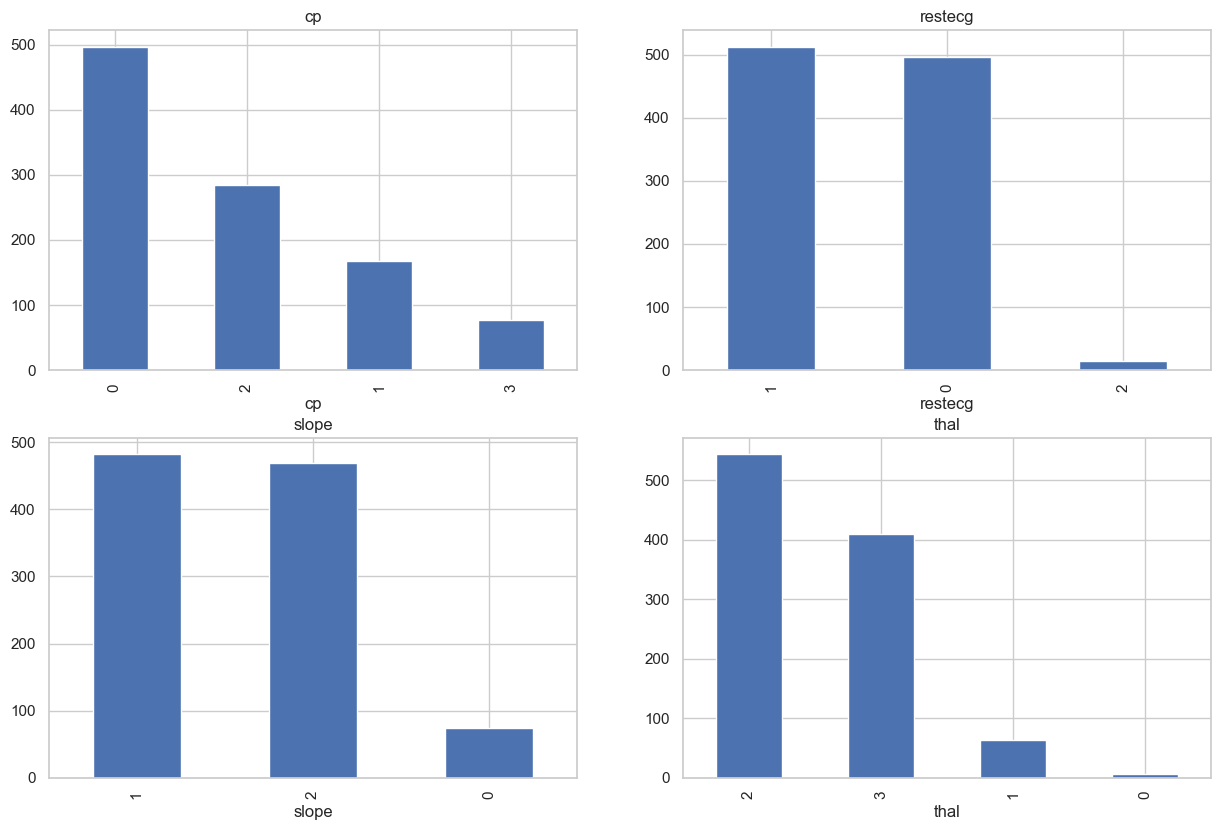

In [29]:
# Variables para graficar

categoricas = ['cp', 'restecg', 'slope','thal' ]

# Crear una figura y un grid de 3x3
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Generar gráficos para cada variable
for idx, col in enumerate(categoricas):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], title=col)

# Si hay subplots restantes, dejarlos vacíos
if len(categoricas) < len(axes):
    for idx in range(len(categoricas), len(axes)):
        fig.delaxes(axes[idx])

# Ajustar el espaciado
plt.show()

Podemos extraer diferentes conclusiones de los gráficos vistos:
En la variable `cp` vemos como los valores no se corresponden a los dados a los mencionados en la documentación. Vamos a determinar entonces que:
   - 0: Dolor tipico de angina
   - 1: Dolor no tipico de angina
   - 2: No es dolor de angina
   - 3: Asintomático
 
Para cuadrar estos valores con la documentación, en el momento de la limpieza cambiaremos los valores a 1,2,3,4 y así no habrá confusión. Comentar también que 0 como Dolor tipico de angina puede provocar confusión, ya que, se puede interpretar como no dolor de pecho o como vacío.
Una vez comentado esto podemos ver como el grupo de Dolor típico de angina es el más abundante con diferencia, seguido tenemos los dolores que no són de angina, dolores no típicos de angina y finalmente los asintomáticos. 

En el siguiente gráfico sobre `restecg` podemos ver como hay una gran diferencia entre los dos primeros grupos y el tercero. Podemos globalizar diciendo que la mayoría de personas presentan un electrocardiograma en reposo normal o con hipertrofia ventricular izquierda probable o definida y muy pocos que tengan anomalías de la onda ST.

Seguidamente, si nos fijamos en el gráfico de `slope` podemos ver como en la gran mayoría de casos nos encontramos o pendientes ascendientes o descendientes y en algunos casos extraños se encuentra plano el cardiograma.

Finalmente, encontramos la variable `thal` la cual menciona que tipo de talasemia (Un trastorno sanguíneo) presenta el paciente. Encontramos como el grupo más abundante es la talasemia beta seguidamente de la alfa. Finalmente podemos ver que en esta muestra de datos hay pocos miembros que no muestren talasemia.

### Variables numéricas

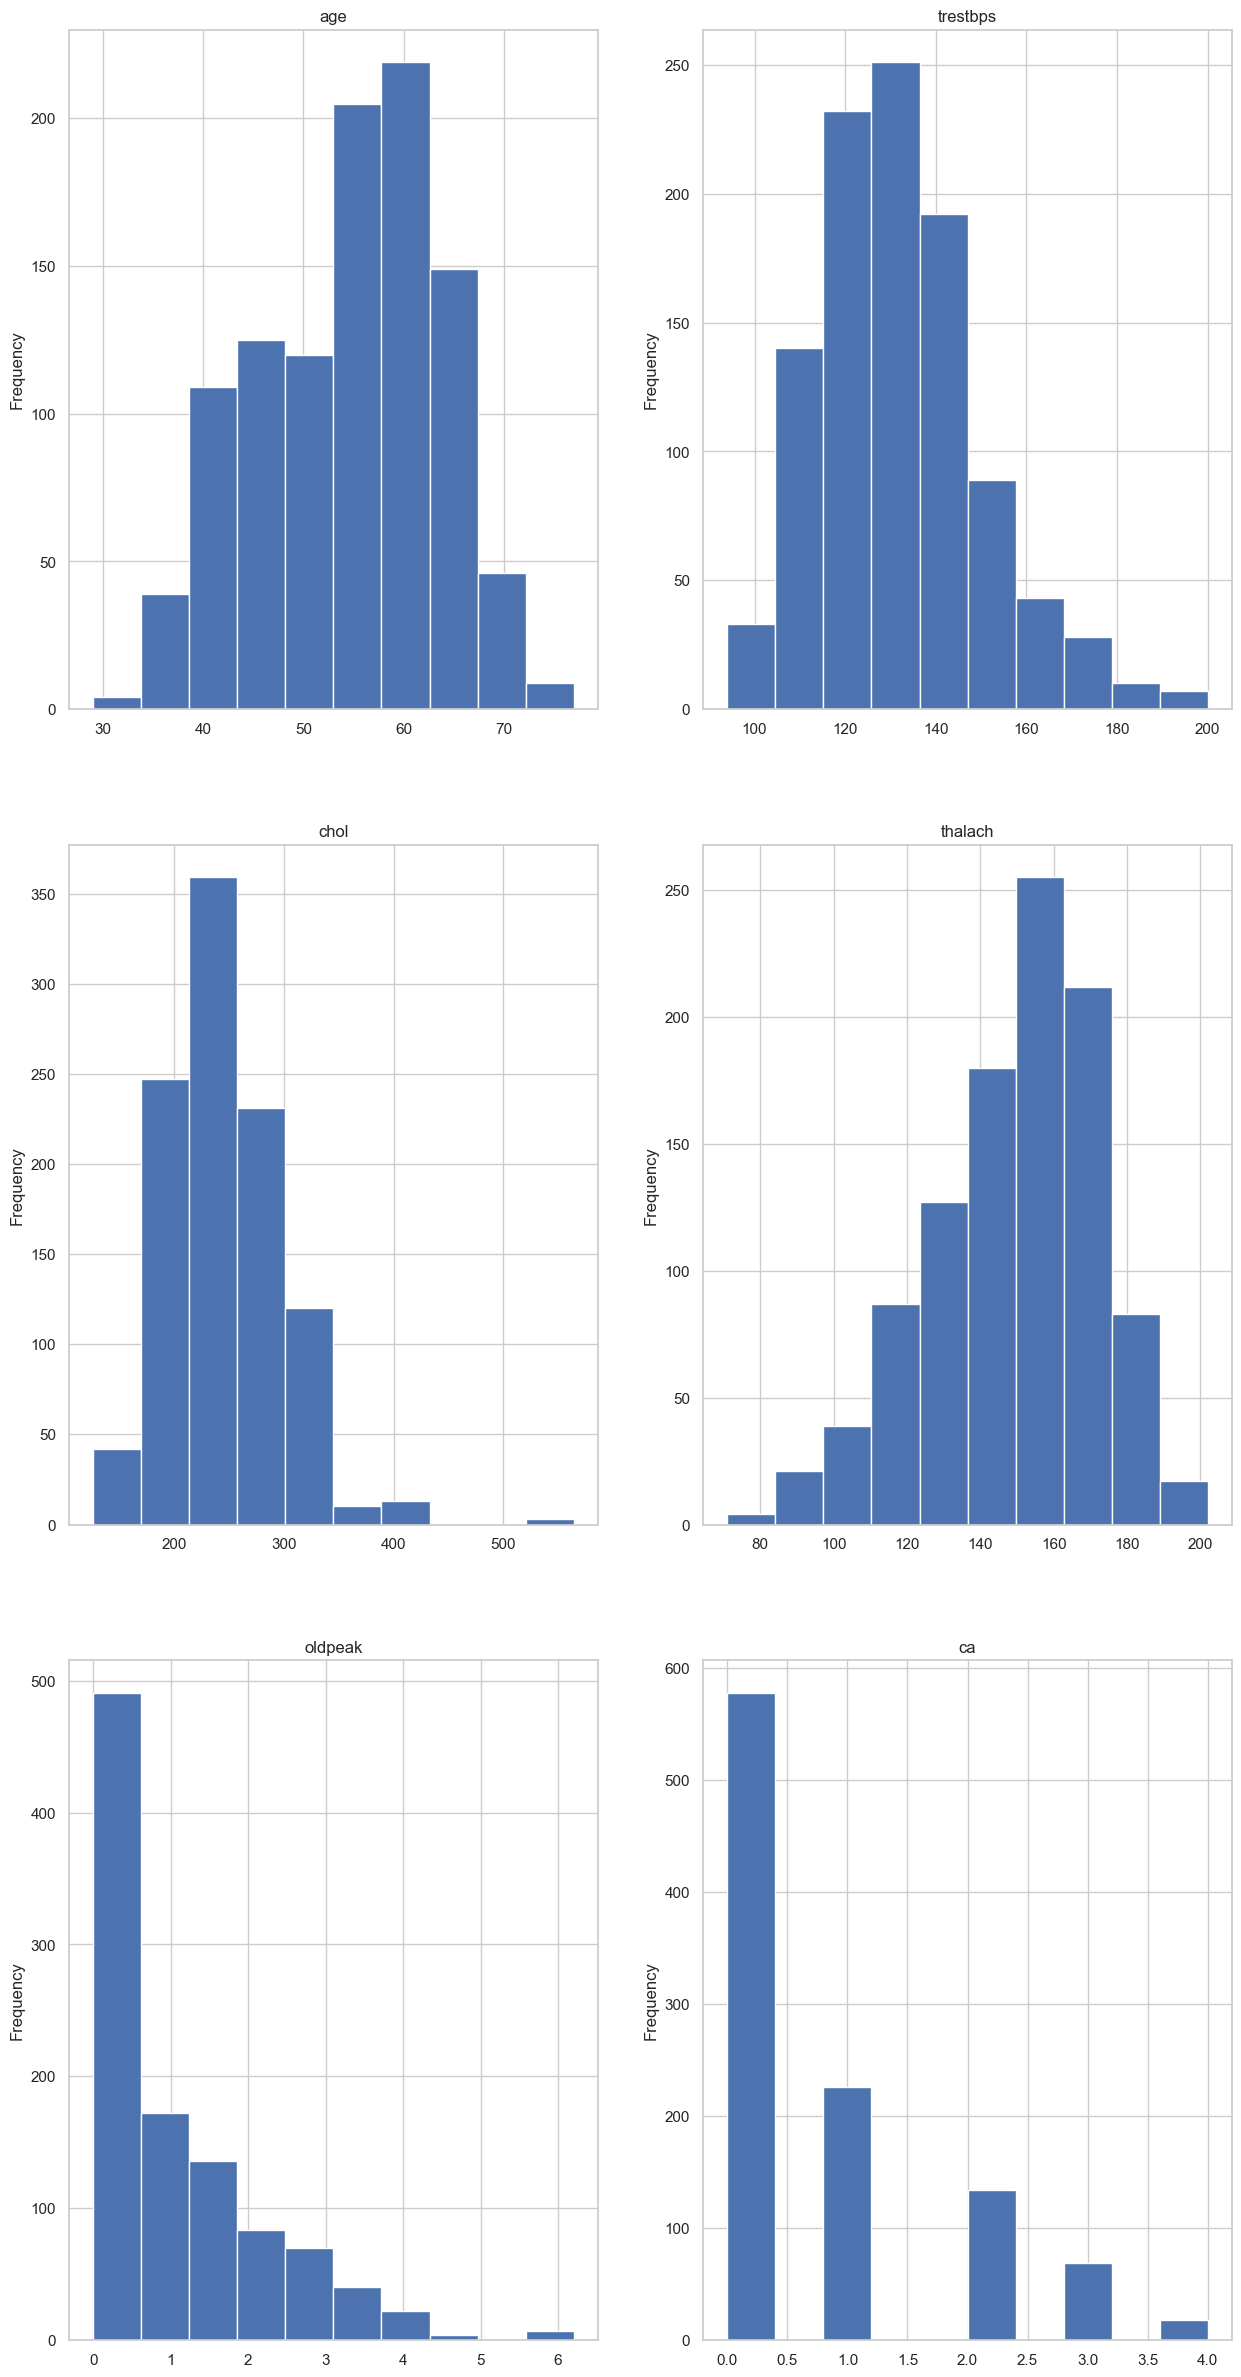

In [30]:
import matplotlib.pyplot as plt

# Variables para graficar
numericas = ['age','trestbps','chol','thalach','oldpeak','ca' ]

# Crear una figura y un grid 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 30))
axes = axes.flatten()

# Generar gráficos para cada variable
for idx, col in enumerate(numericas):
    # Verificar si la columna es numérica antes de graficar un histograma
    if df[col].dtype.kind in 'bifc':
        df[col].plot(kind='hist', ax=axes[idx], title=col)
    else:
        df[col].value_counts().plot(kind='bar', ax=axes[idx], title=col)

# Si hay subplots restantes, dejarlos vacíos
if len(categoricas) < len(axes):
    for idx in range(len(numericas), len(axes)):
        fig.delaxes(axes[idx])

# Ajustar el espaciado
plt.show()


Ahora vamos a proceder a comentar estas visualizaciones:
- En el caso de `age` nos encontramos que todos los pacientes se encuentran entre los 30 y más de 75 años, siendo entre 50 y 60 años donde se encuentran la mayoría de los pacientes. 
- Para `trestbps` vemos como los datos se muestran superiores a la izquierda que la derecha. Además encontramos mayormente valores entre 120 y 140 mm Hg de presión arterial.
- Lo mismo ocurre con `chol` los valores se encuentran sobre todo en la zona de la izquierda teniendo entre 200 y 300 los valores más frecuentes de colesterol (mg/dl).
- En cambio, `thalach` muestra valores más frecuentes en la parte de la derecha. Las frecuencias cardiacas máximas más comunes son entre 140 y 160.
- Podemos ver como la gran mayoría de diferencias entre los ST en reposo y en ejercicio (la variable `oldpeak`) se encuentran entre 0 y 1. Posteriormente, vemos como la frecuencia va disminuyendo a medida uqe aumentamos el valor de la diferencia. 
- Finalmente con la variable `ca` vemos que todos los valores son enteros, lo cual era lo previsto, ya que, nos encontramos contando la cantidad de vasos mayores coloreados por flouroscopia. Es importante mencionar que en principio en la documentación se mencionaba que los valores debian oscilar solo entre 0 y 3. Por ello debemos revisar si esos valores de 4 son normales o no. Lo ideal también es revisar documentación externa sobre vasos mayores a ver si es habitual. 

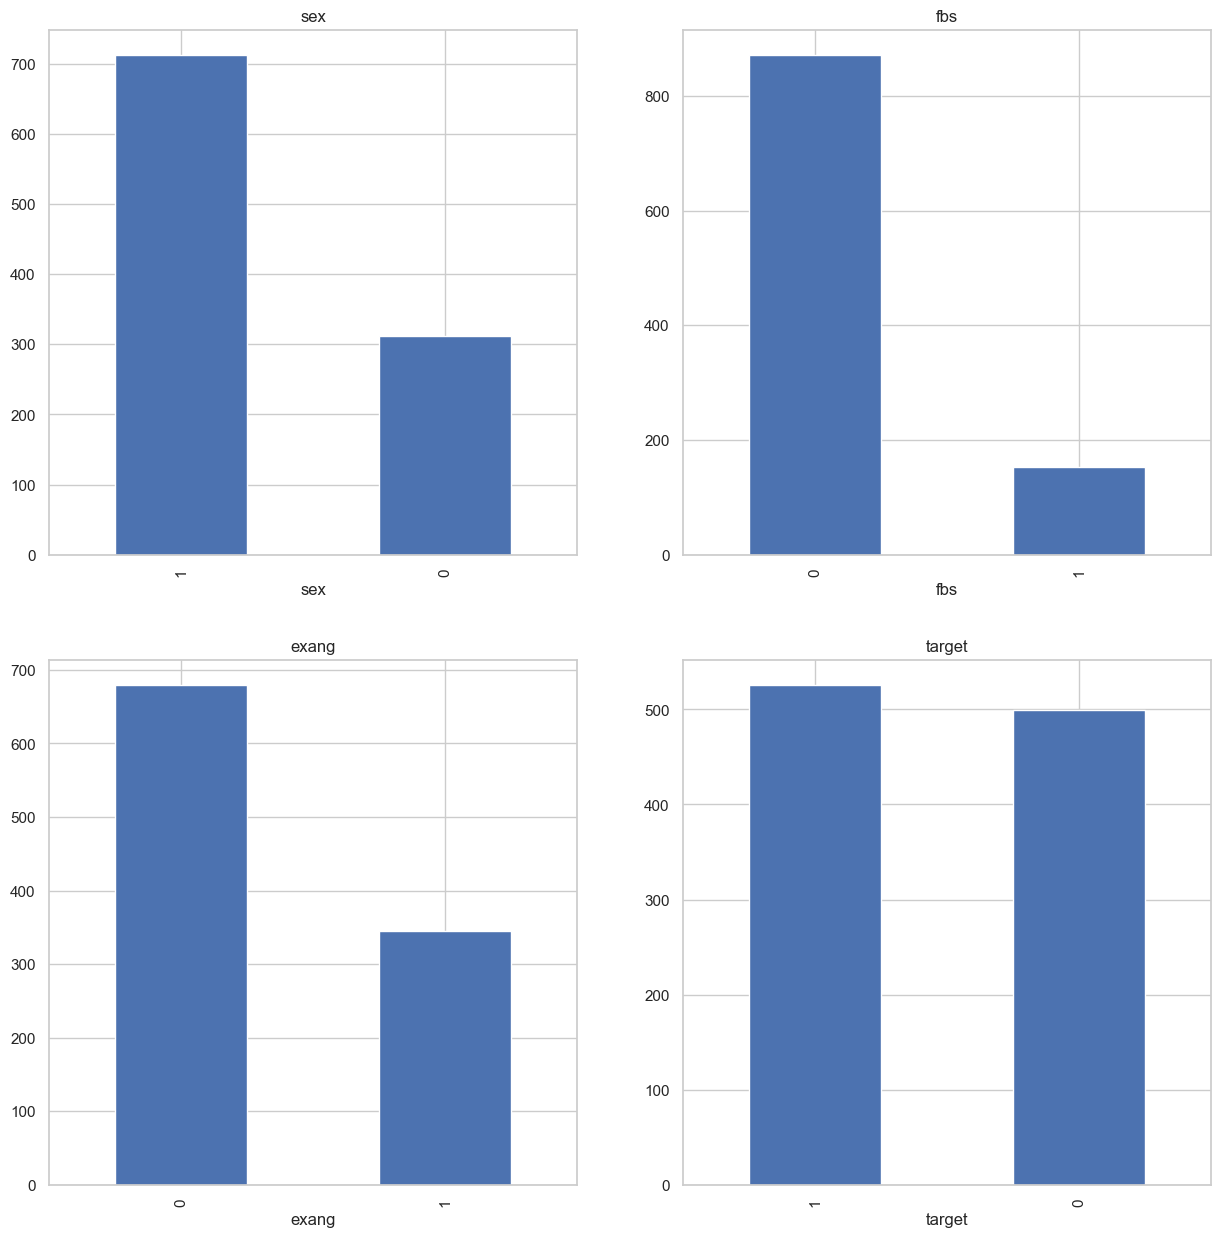

In [31]:
# Variables para graficar
binari = ['sex','fbs','exang','target' ]

# Crear una figura y un grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Generar gráficos para cada variable
for idx, col in enumerate(binari):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], title=col)

# Si hay subplots restantes, dejarlos vacíos
if len(binari) < len(axes):
    for idx in range(len(binari), len(axes)):
        fig.delaxes(axes[idx])

# Ajustar el espaciado
plt.show()


Vamos a proceder a comentar los gráficos de las variables binarias.
- En primer lugar, vemos como encontramos más hombres que mujeres en la muestra de datos.
- Además la gran mayoría de individuos presentan más de 120 mg/dl de glucemia en ayunas.
- La angina puede ser inducida por diversos factores que provocan que el corazón esté forzado a estrés, una de estas razones puede ser el ejercicio o el estrés. Esta variable `exang` muestra como la mayoría de pacientes con angina no ha sido causada por el deporte sino por otro síntoma.
- Podemos ver en la variable `target` como tenemos poco más pacientes con cardiopatías en comparación con las personas que no lo padecen. 

De manera global podemos ver como nuestro dataset ya parte de personas que sufren patologías relacionadas con la sangre o el corazón, concepto que teníamos ya presente dado que nos encontramos con un dataset especializado y captado los datos de hospitales.

# <a id="sección-3"></a>Limpieza y preparación de los datos

Hemos visto que los datos són bastante consistentes y no tienen valores nulos. Por ello vamos a realzar los pequeños cambios planteados. 

En primer lugar, vamos a cambiar la variable `cp` como hemos mencionado anteriormente para hacer coincidir los diferentes valores con los mostrados en la documentación. Hemos optado por mantener el orden establecido en la documentación (1, 2, 3, 4) y asignar los valores correspondientes la dataset (0, 1, 2, 3). 

In [32]:
reemplazos = {0: 1, 1: 2, 2: 3, 3: 4}
df['cp'] = df['cp'].replace(reemplazos)

df['cp'].unique()

array([1, 2, 3, 4])

### Valores nulos

Nuevamente vamos a comprobar que no nos encontramos con valores faltantes.

In [33]:
df.isnull().mean() * 100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

Vemos como efectivamente no tenemos datos nulos. 

### Eliminar outliers

Vamos a comprobar si encontramos valores extremos o outliers. Para visualizarlo más claramente vamos a elaborar unas boxplot para cada una de las variables numéricas a estudiar.

<Figure size 1000x600 with 0 Axes>

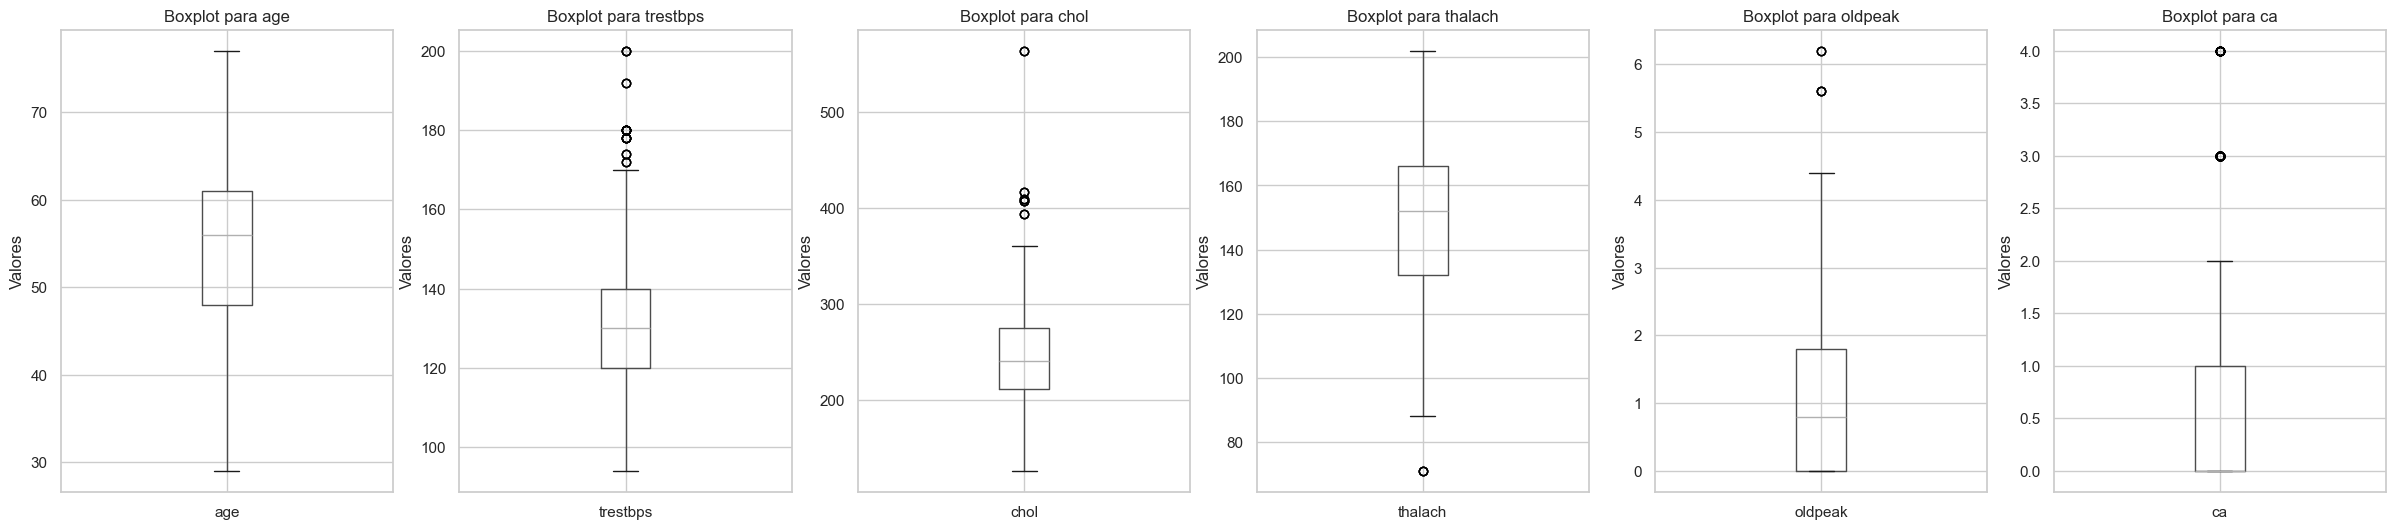

In [34]:
# Crear una figura para el gráfico
plt.figure(figsize=(10, 6))

# Filtrar solo las columnas numéricas
df_numeric = df[numericas]

num_columns = len(df_numeric.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 6))

numericas = ['age','trestbps','chol','thalach','oldpeak','ca' ]

# Generar un boxplot para cada columna numérica
for i, col in enumerate(df_numeric.columns):
    df_numeric.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot para {col}')
    axes[i].set_ylabel('Valores')


Podemos ver como encontramos outliers a eliminar en `trestbps`, `chol`, `thalach`, `oldpeak` y `ca`. Procedemos a eliminar dichos valores.

In [35]:
def eliminar_outliers(df, columnas, threshold=1.5):
    # Crear una copia del DataFrame para no modificar el original
    df_sin_outliers = df.copy()
    
    # Identificar y eliminar outliers solo en las columnas especificadas
    for col in columnas:
        if col in df_sin_outliers.columns:
            Q1 = df_sin_outliers[col].quantile(0.25)
            Q3 = df_sin_outliers[col].quantile(0.75)
            IQR = Q3 - Q1
            filtro_inferior = Q1 - threshold * IQR
            filtro_superior = Q3 + threshold * IQR
            df_sin_outliers[col] = df_sin_outliers[col].mask((df_sin_outliers[col] < filtro_inferior) | (df_sin_outliers[col] > filtro_superior), np.nan)
    
    return df_sin_outliers

# Columnas especificadas para eliminar outliers
outliers = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Aplicar la función para eliminar outliers
df = eliminar_outliers(df, outliers)
def eliminar_outliers_especificos(df, col, threshold=1.5):
    df_modificado = df.copy()
    Q1 = df_modificado[col].quantile(0.25)
    Q3 = df_modificado[col].quantile(0.75)
    IQR = Q3 - Q1
    filtro_inferior = Q1 - threshold * IQR
    filtro_superior = Q3 + threshold * IQR
    
    df_modificado[col] = df_modificado[col].mask((df_modificado[col] < filtro_inferior) | (df_modificado[col] > filtro_superior), np.nan)
    
    return df_modificado

threshold_oldpeak = 1.0  
df = eliminar_outliers_especificos(df, 'oldpeak', threshold_oldpeak)


df.dropna(inplace=True)

Para comprobar si se han eliminado los valores atípicos vamos a realizar los boxplots nuevamente.

<Figure size 1000x600 with 0 Axes>

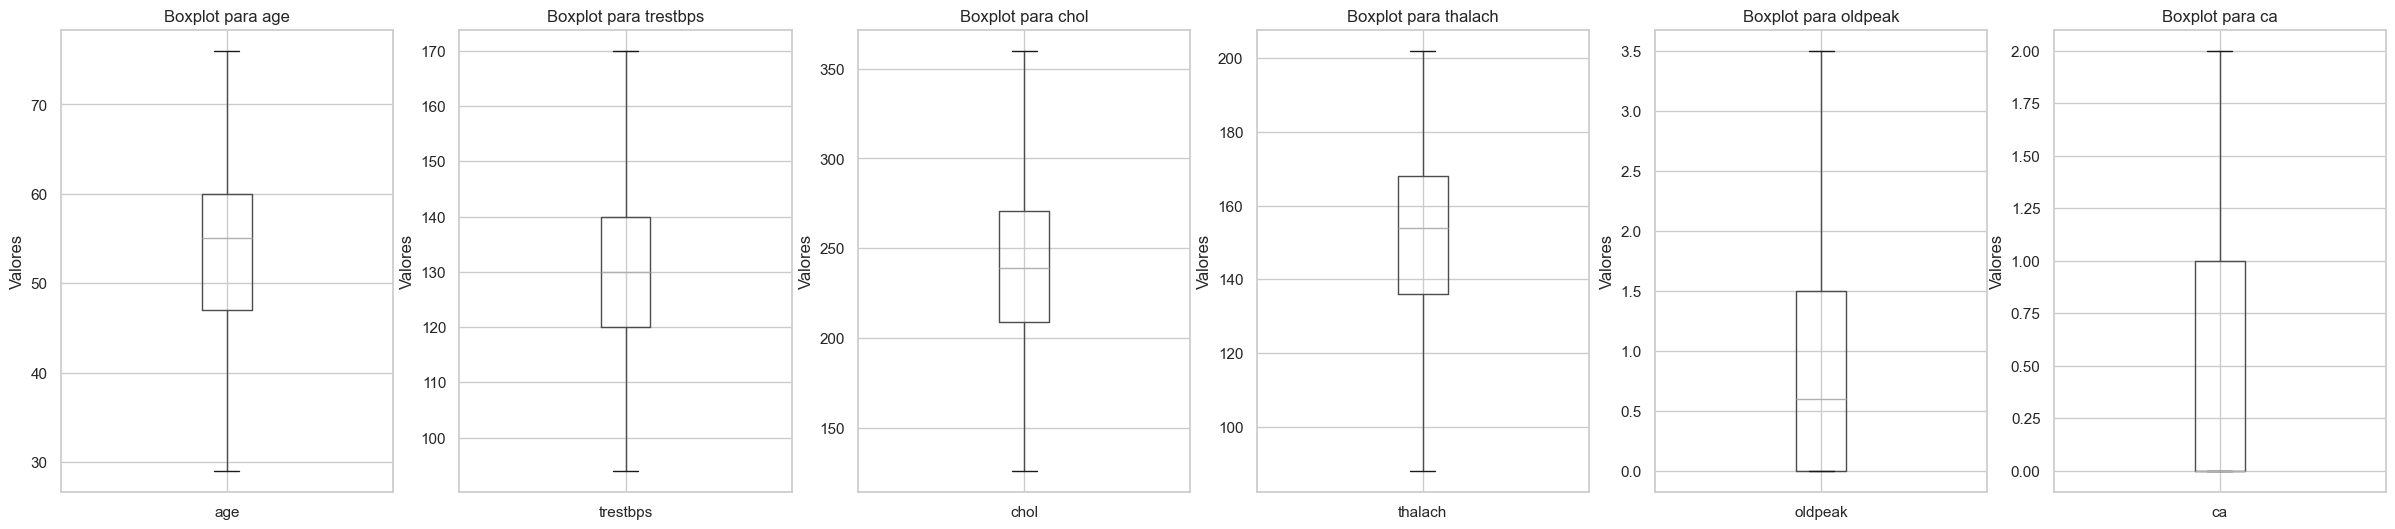

In [36]:
# Crear una figura para el gráfico
plt.figure(figsize=(10, 6))

# Filtrar solo las columnas numéricas
df_numeric = df[numericas]

num_columns = len(df_numeric.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 6))

numericas = ['age','trestbps','chol','thalach','oldpeak','ca' ]

# Generar un boxplot para cada columna numérica
for i, col in enumerate(df_numeric.columns):
    df_numeric.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot para {col}')
    axes[i].set_ylabel('Valores')




# <a id="sección-5"></a>Discretización de los datos

Este paso se incluiría dentro de la transformación de datos, pero dado la estructura del enunciado vamos a realizarlo por separado.

En este caso vamos a optar por realizar una nueva variable para determinar si una persona tiene la tensión alta o no. Para determinar el rango de los diferentes valores de dicha variable vamos a utilizar los parámetros establecidos por [American College of Cardiology](https://www.acc.org/Latest-in-Cardiology/Articles/2024/02/05/11/43/2023-ESH-Hypertension-Guideline-Update#:~:text=Systolic%20blood%20pressure%20(SBP)%20ranging,85%2D89%20mm%20Hg). Estos valores van a ser basados en la variable `trestbps`. Obviamente, debemos establecer valores numéricos a dichas variables:
- (0) Normal : Menos de 120 milímetros de mercurio.
- (1) Alta : Entre 120 y 129 milímetros de mercurio.
- (2) Hipertensión etapa 1: Entre más de 129 milímetros de mercurio y 139. 
- (3) Hipertensión etapa 2: Entre más de 139 milímetros de mercurio y 180.
- (4) Crísis hipertensiva: Más de 180milímetros de mercurio.

Destacar que aquellos datos que se encuentren en Crísis hipertensiva deben buscar atención médica de urgéncia. 


In [37]:
# Función para clasificar los valores de presión arterial
def classify_bp(bp):
    if bp < 120:
        return 0
    elif 120 <= bp <= 129:
        return 1
    elif 130 <= bp <= 139:
        return 2
    elif 140 <= bp <= 180:
        return 3
    else:
        return 4

# Aplicar la función al DataFrame
df['tension'] = df['trestbps'].apply(classify_bp)

category_counts = df['tension'].value_counts()

df['chol_age_ratio'] = df['chol'] / df['age']
numericas.append('chol_age_ratio')


### Escalar los datos

A continuacion vamos a centrar (restar la media) y escalar (dividir por la desviación estándar) para las variables de numéricas que estamos estudiando:

In [38]:
df_target = df
df=df.drop('target',axis=1)
# Estandarizar los datos
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized)

### Datos redundantes 

Ahora procedemos a realizar la matriz de covarianza para comprobar si hay alguas variables que tienen una relación muy alta. Esto puede significar que ambas variables nos informan de lo mismo, por ello, podríamos optar en eliminar alguna.

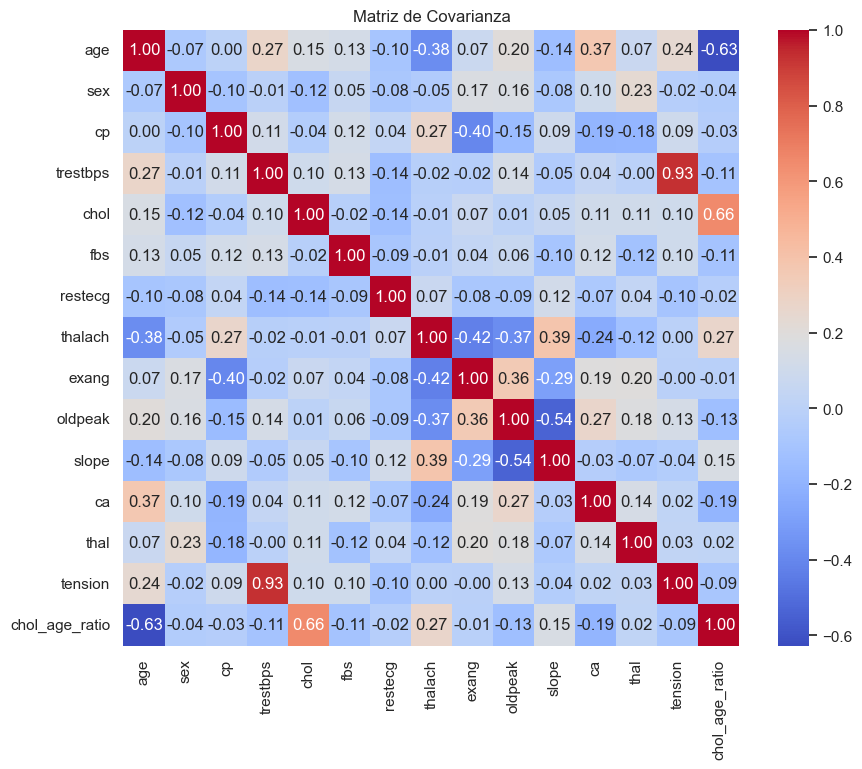

In [39]:
# Calcular la matriz de covarianza
cov_matrix = df_standardized.cov()

columns = df.columns
# Graficar la matriz de covarianza
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, xticklabels=columns, yticklabels=columns)
plt.title('Matriz de Covarianza')
plt.show()

Vemos como ningún valor supera el 0.95 en valor absoluto, por ello podemos optar a priori por conservar todas las variables. Si es cierto que las variables `tension` y `trestbps` tienen valores muy altos, pero por ahora vamos a mantenerla.

# <a id="sección-6"></a>Estudio SVD 

Procedemos a aplicar un estudio SVD con el objetivo de reducir la dimensionalidad, manejar la multicolinealidad identificar patrones y relaciones entre las variables con el objetivo de mejorar nuestro modelo predictivo. 

Empezamos realizando el estudio y visualizando las diferentes matrices.

In [40]:
U, s, Vt = np.linalg.svd(df[numericas], full_matrices=False)
print('U')
print(U)

print('Vt')
print(Vt)

print('s')
print(s)

U
[[-0.0319628  -0.0340369   0.01350188 ...  0.02864429 -0.07869305
  -0.00607138]
 [-0.03124043 -0.03554608 -0.02215775 ...  0.07254143  0.04834765
  -0.03722276]
 [-0.02789273 -0.03477778 -0.0753902  ...  0.03131407  0.06388923
   0.02701013]
 ...
 [-0.03387762  0.05080605  0.00819424 ...  0.00895734 -0.01730946
   0.06202085]
 [-0.03426218  0.00586904  0.038602   ... -0.02282079  0.01679953
   0.01262939]
 [-0.02708134 -0.00674079 -0.03875054 ...  0.01444492 -0.01109395
   0.04679292]]
Vt
[[-0.16747016 -0.40309174 -0.76739095 -0.46942423 -0.00279406 -0.00160073
  -0.01457521]
 [-0.05224197 -0.33321271  0.61977111 -0.70857756  0.0030185   0.00336493
   0.00460863]
 [-0.34428989 -0.76392151  0.15683656  0.5218328  -0.01919996 -0.00831415
   0.02331208]
 [ 0.91942565 -0.37764416 -0.04435213  0.07071954  0.00703541  0.02411397
  -0.06664852]
 [-0.0134814  -0.01186691 -0.00272063  0.01009261  0.96192016  0.25774414
   0.08857616]
 [ 0.02746826 -0.00728632 -0.00129327 -0.00261533  0.24953

Ahora vamos a calcular la varianza acumulativa y realizar un gráfico para ver cuantos componentes principales definen la gran mayoría del dataset.

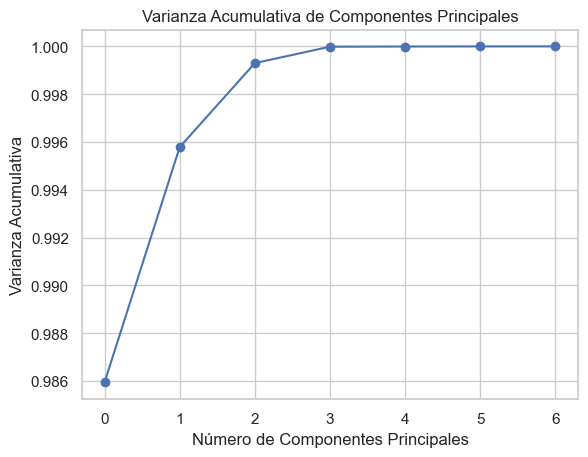

Varianza Acumulativa de Componentes Principales:
[0.98594669 0.99578572 0.99929941 0.99998642 0.99999453 0.99999847
 1.        ]


In [41]:
varianza_acumulativa = np.cumsum(s**2) / np.sum(s**2)


plt.plot(varianza_acumulativa, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa')
plt.title('Varianza Acumulativa de Componentes Principales')
plt.show()

print("Varianza Acumulativa de Componentes Principales:")
print(varianza_acumulativa)

Podemos ver como con 2 componentes ya describimos más del 90% del dataset. Podemos ver visualmente estos dos componentes.

In [42]:
U, s, Vt = np.linalg.svd(df[numericas], full_matrices=False)

Sigma_3 = np.diag(s[:2])
U_3 = U[:, :2]
VT_3 = Vt[:2, :]

A = np.dot(U_3, np.dot(Sigma_3, VT_3))
svd_df = pd.DataFrame(data=A,columns=numericas)

# añadimos la variable objetivo
svd_df['target'] = df_target['target']

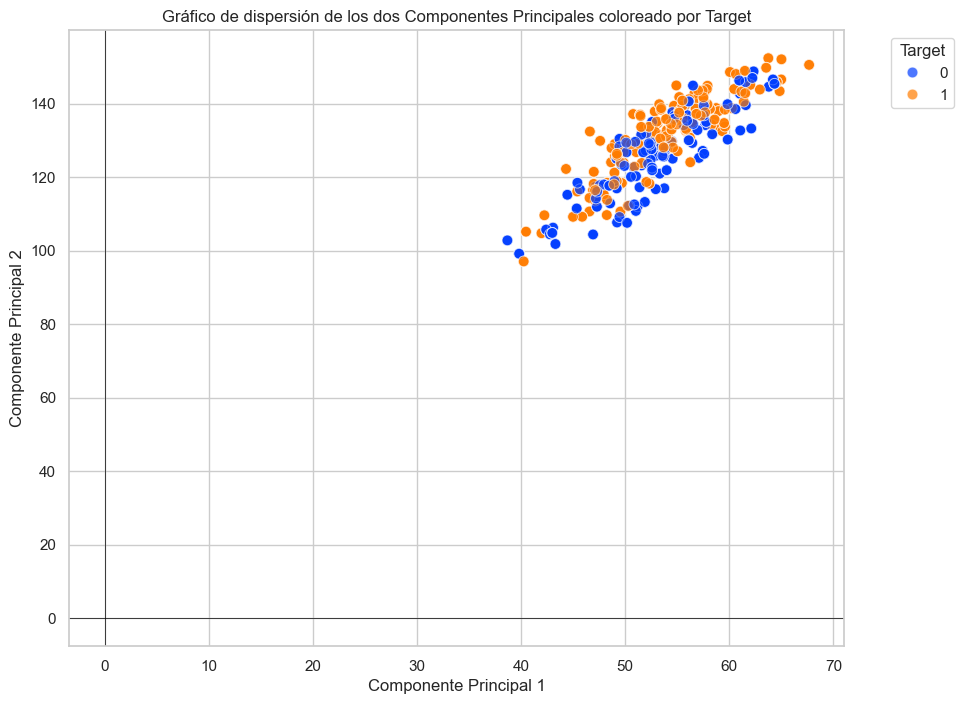

In [43]:
PC1 = A[:, 0]
PC2 = A[:, 1]
principal_components_df = pd.DataFrame({
    'PC1': PC1,
    'PC2': PC2,
    'target': df_target['target'] 
})
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de dispersión de los dos componentes principales
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='target', data=principal_components_df, s=60, palette='bright', alpha=0.7)
plt.title('Gráfico de dispersión de los dos Componentes Principales coloreado por Target')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

# Añadir leyenda
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Ahora debemos ver cuáles son las variables con más peso dentro de estos componentes, de esta manera, podemos determinar cuáles son las variables con más peso en el estudio. Para ello vamos a ver visualmente el peso de estas correlaciones. 

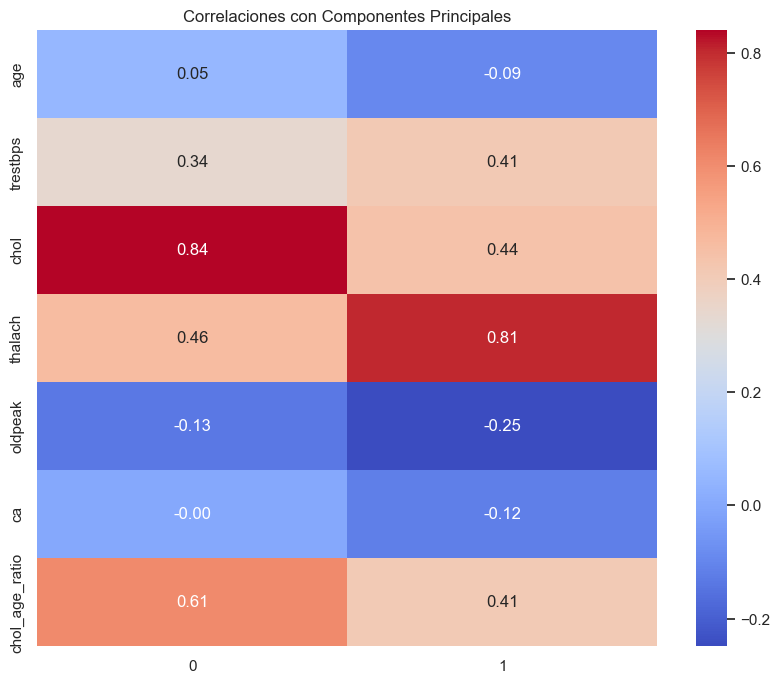

In [44]:
correlations = {}
for col in numericas:
    correlations[col] = {
        'Correlación con PC1': np.corrcoef(df[col], PC1)[0, 1],
        'Correlación con PC2': np.corrcoef(df[col], PC2)[0, 1]
    }

correlation_df = pd.DataFrame(correlations).T

# Calcular correlaciones para PC1 y PC2 con cada variable original
correlation_matrix = []
for col in numericas:
    correlation_matrix.append([
        np.corrcoef(df[col], PC1)[0, 1],
        np.corrcoef(df[col], PC2)[0, 1]
    ])

correlation_matrix = np.array(correlation_matrix)
correlation_matrix = pd.DataFrame(correlation_matrix,index=numericas)
# Crear el gráfico
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
ax.set_title('Correlaciones con Componentes Principales')
plt.show()


In [45]:
max_abs_values = correlation_df.abs().max()
print(max_abs_values)

indices_max_abs = correlation_df.abs().idxmax()
print(indices_max_abs)

Correlación con PC1    0.840173
Correlación con PC2    0.805855
dtype: float64
Correlación con PC1       chol
Correlación con PC2    thalach
dtype: object


Vemos como en valor absoluto las dos variables con más peso son `chol` y `thalach` ambas con un 0.80 aproximadamente. Podemos concluir entonces que las dos variables más influyentes en el estudio son la cantidad  de serum de colesterol (mg/dl) y la frecuencia cardiaca máxima alcanzada del paciente.

[NbConvertApp] Converting notebook PRA1_script(2).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 913434 bytes to PRA1_script(2).html


0